#### imports

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### dirs

In [ ]:
eraser_dir = '/content/drive/MyDrive/NLP_project'
bert_eraser_sub = '/bert_eraser/results'
gpt_eraser_sub = '/gpt_eraser/results'

#### inspect funcs

In [ ]:
def inspect_metric(df):
    precision = df['precision']
    weight_recall = df['weight_recall']
    f1 = df['f1_token']
    span_hit_recall = df['span_hit_recall']
    jaccard = df['jaccard_similarity']

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(precision, weight_recall, c=f1, cmap='plasma', s=30, alpha=0.8)

    cbar = plt.colorbar(scatter)
    cbar.set_label('F1 Token Score')

    plt.xlabel('Precision')
    plt.ylabel('Weight Recall')
    plt.title('Precision vs. Weight Recall colored by F1 Token Score')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    scatter_span = plt.scatter(precision, weight_recall, c=span_hit_recall, cmap='viridis', s=30, alpha=0.8)
    cbar_span = plt.colorbar(scatter_span)
    cbar_span.set_label('Span Hit Recall')
    plt.xlabel('Precision')
    plt.ylabel('Weight Recall')
    plt.title('Precision vs. Weight Recall colored by Span Hit Recall')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    X = precision.values.reshape(-1, 1)
    y = weight_recall.values
    model = LinearRegression()
    model.fit(X, y)

    x_fit = np.linspace(0, 1, 100)
    y_fit = model.predict(x_fit.reshape(-1, 1))

    plt.figure(figsize=(8, 6))
    plt.scatter(precision, weight_recall, color='gray', s=20, alpha=0.5, label='Examples')
    plt.plot(x_fit, y_fit, color='black', linestyle='--', linewidth=2, label='Linear Fit')
    plt.xlabel('Precision')
    plt.ylabel('Weight Recall')
    plt.title('Linear Trend of Weight Recall vs. Precision')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



    plt.figure(figsize=(8, 6))
    scatter_jaccard = plt.scatter(precision, weight_recall, c=jaccard, cmap='inferno', s=30, alpha=0.8)
    cbar_jaccard = plt.colorbar(scatter_jaccard)
    cbar_jaccard.set_label('Jaccard Similarity')
    plt.xlabel('Precision')
    plt.ylabel('Weight Recall')
    plt.title('Precision vs. Weight Recall colored by Jaccard Similarity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def merge_batches(dir):
    batch_size = 10
    set_size = 1600
    dfs = []


    for i in range(0, set_size, batch_size):
        if os.path.exists(f"{dir}/batch_{i}_metrics.parquet"):
            df_i = pd.read_parquet(f"{dir}/batch_{i}_metrics.parquet")
            df_i.index = range(i, i + len(df_i))
            dfs.append(df_i)
    df = pd.concat(dfs)
    df.index.name = "global_id"
    return df

def merge_batches_results(dir):
    batch_size = 10
    i = 0
    dfs = []

    while os.path.exists(f"{dir}/batch_{i}.parquet"):
        df_i = pd.read_parquet(f"{dir}/batch_{i}.parquet")
        df_i.index = range(i, i + len(df_i))
        dfs.append(df_i)
        i += batch_size

    df = pd.concat(dfs)
    df.index.name = "global_id"
    return df

#### creating the plots

In [ ]:
eraser_dir = '/content/drive/MyDrive/NLP_project'
bert_eraser_sub = '/bert_eraser/results'
gpt_eraser_sub = '/gpt_eraser/results'

In [ ]:
method_dirs = ['/gradient', '/linear', '/perturbation']

In [ ]:
eraser_dir = '/content/drive/MyDrive/NLP_project'
bert_eraser_sub = '/bert_eraser/results'
gpt_eraser_sub = '/gpt_eraser/results'
eraser_subs = [bert_eraser_sub, gpt_eraser_sub]
eraser_dirs = [eraser_dir + model + method
               for model in eraser_subs
               for method in method_dirs]
gpt_dirs = [eraser_dir + model + method
               for model in eraser_subs
               for method in method_dirs]

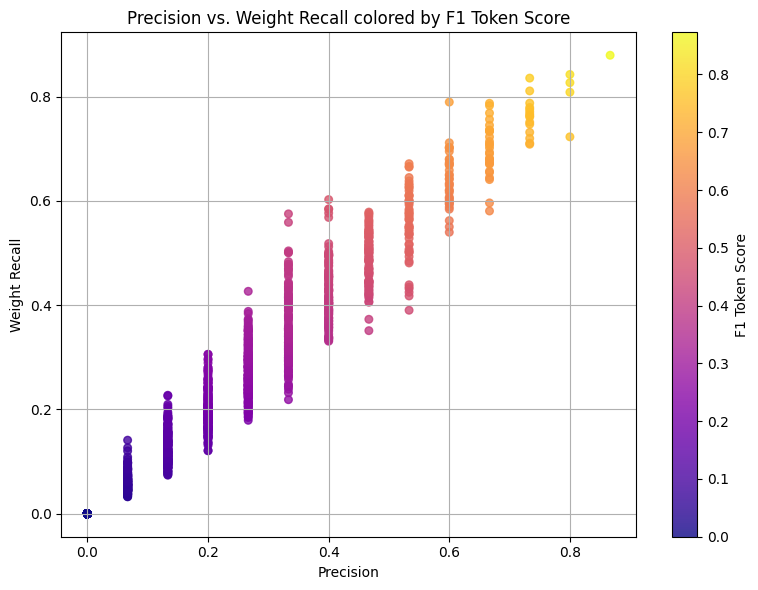

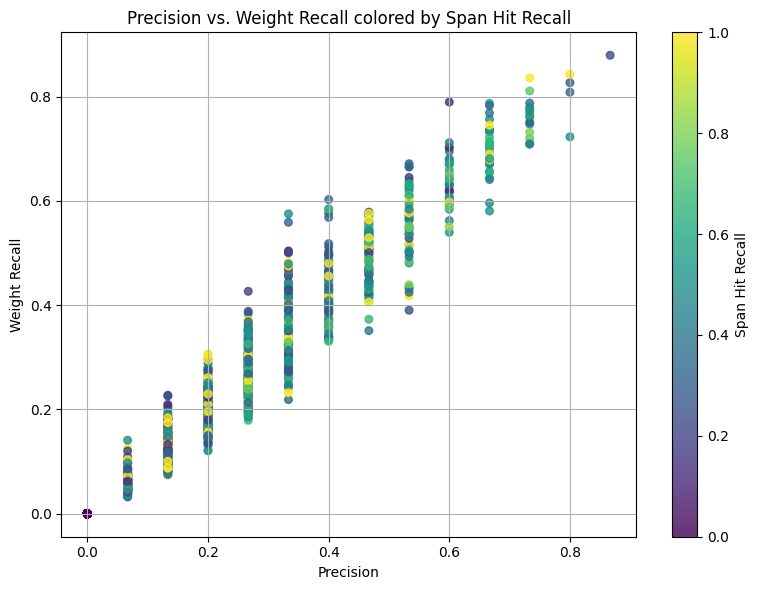

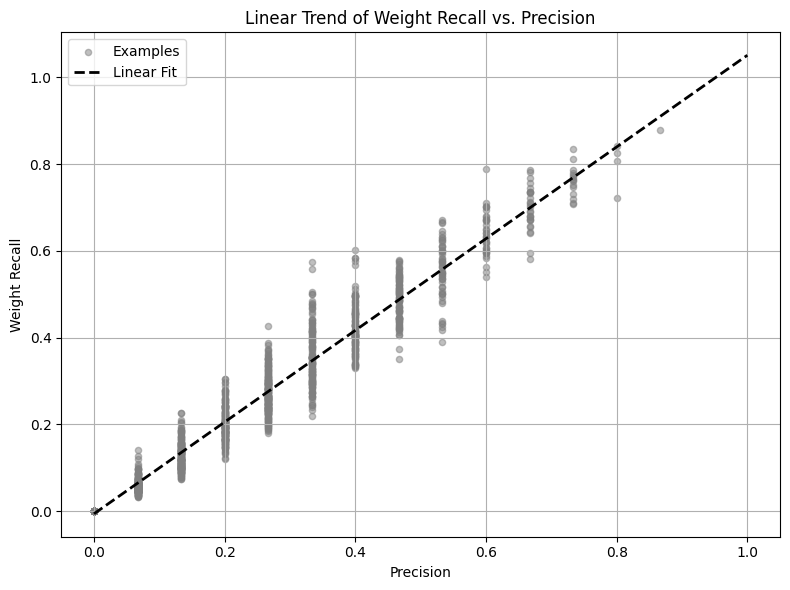

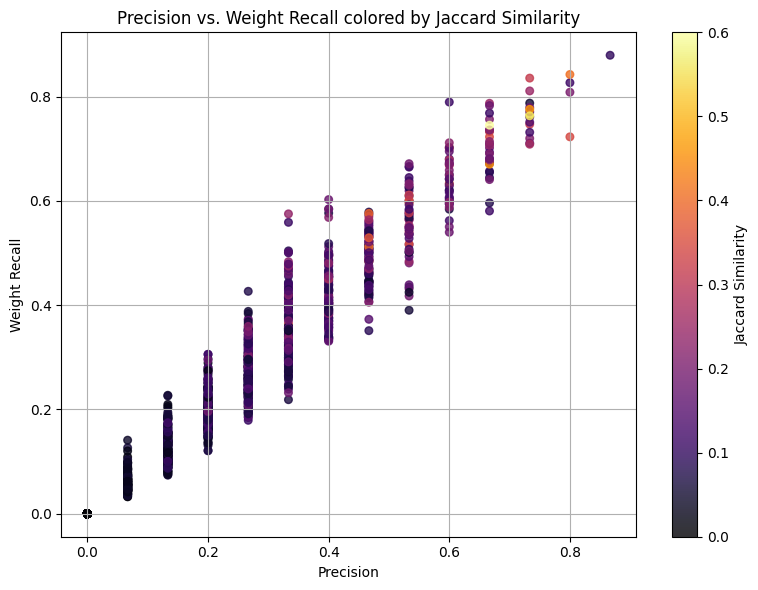

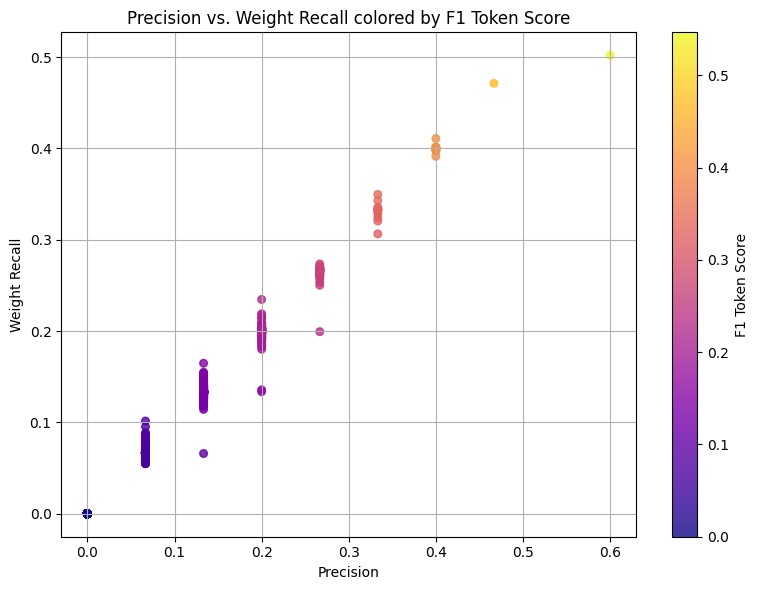

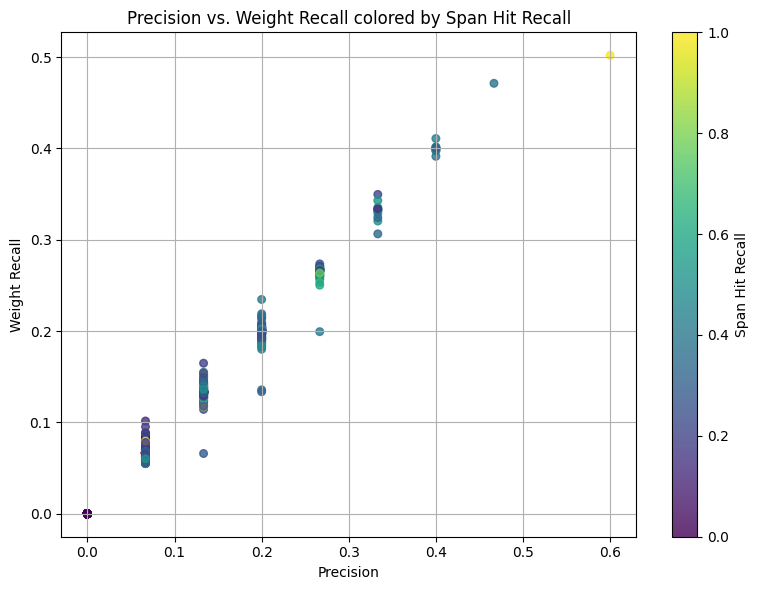

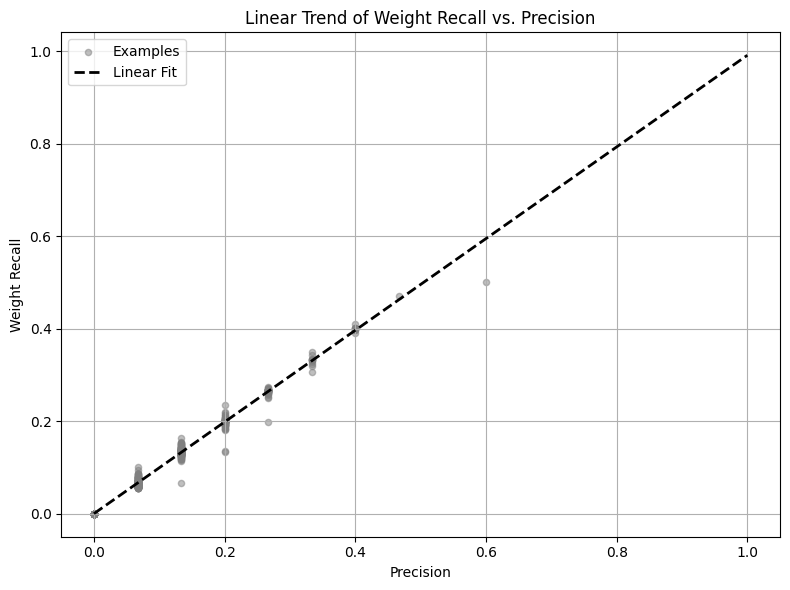

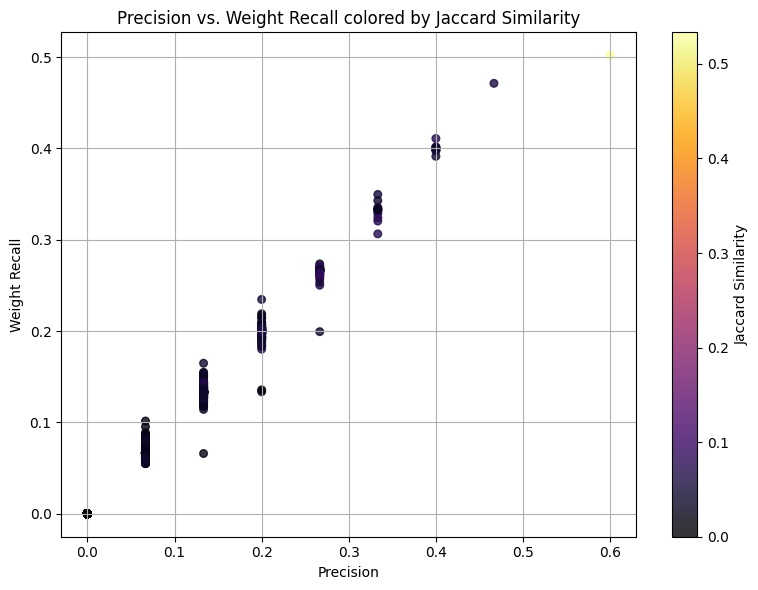

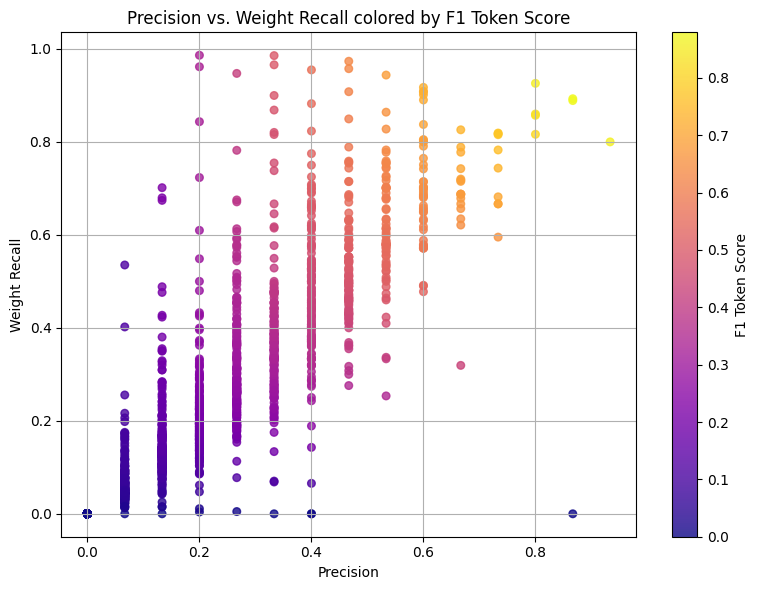

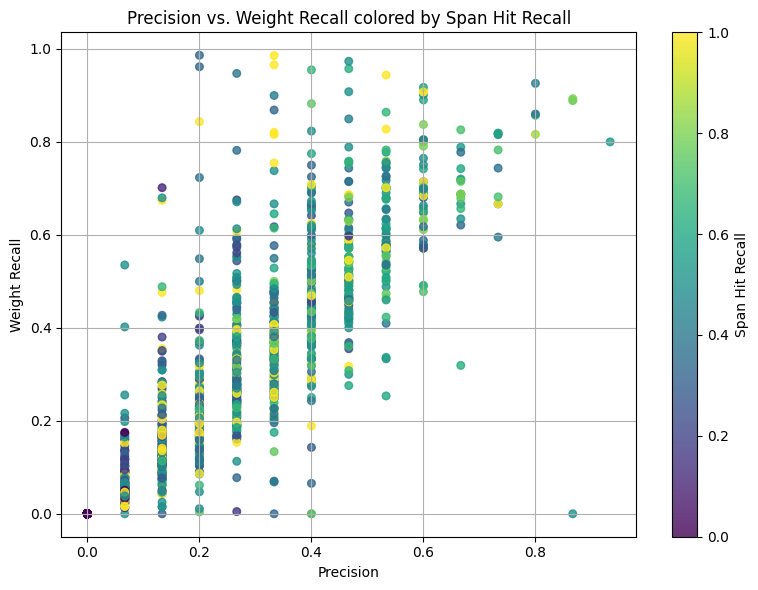

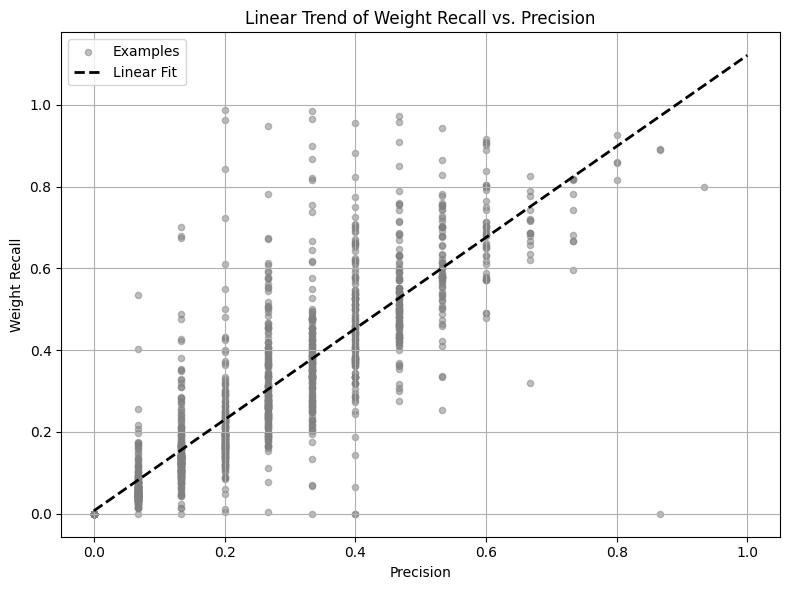

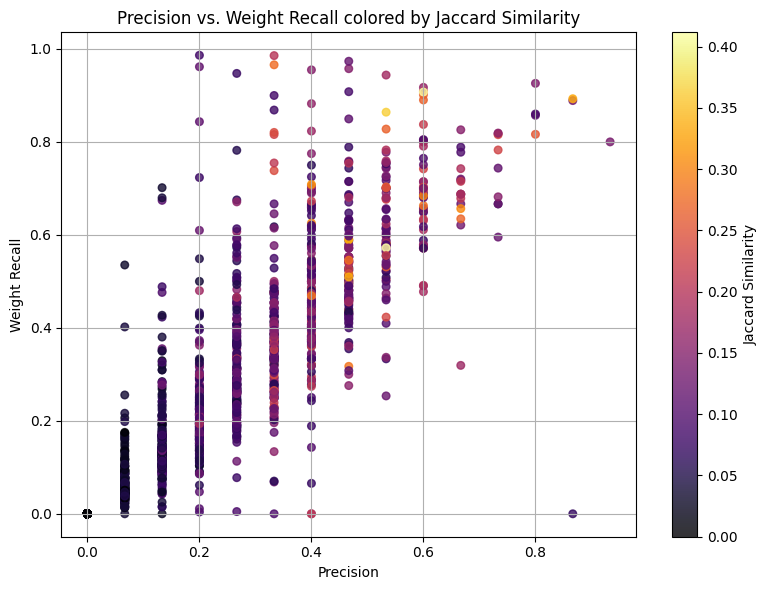

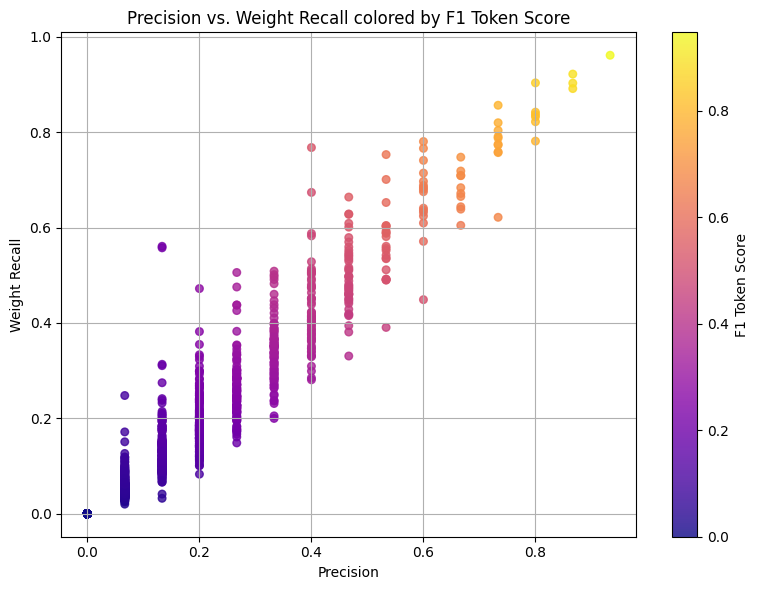

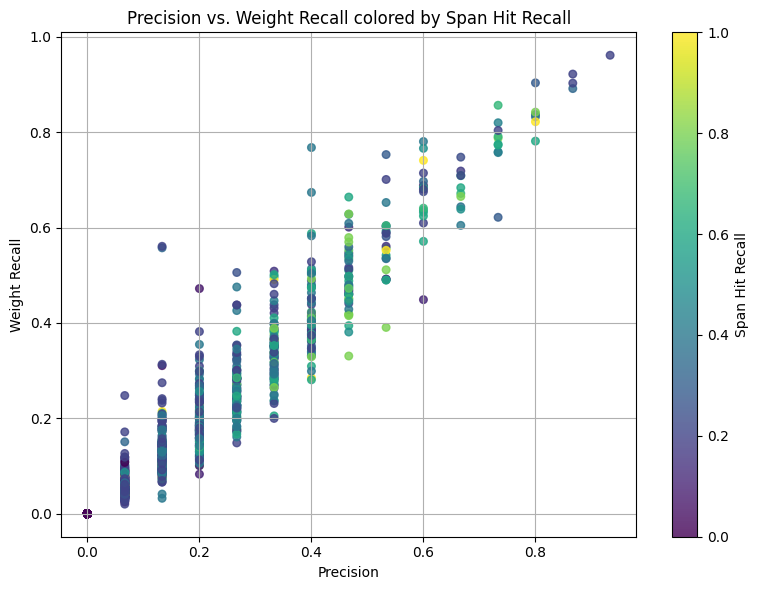

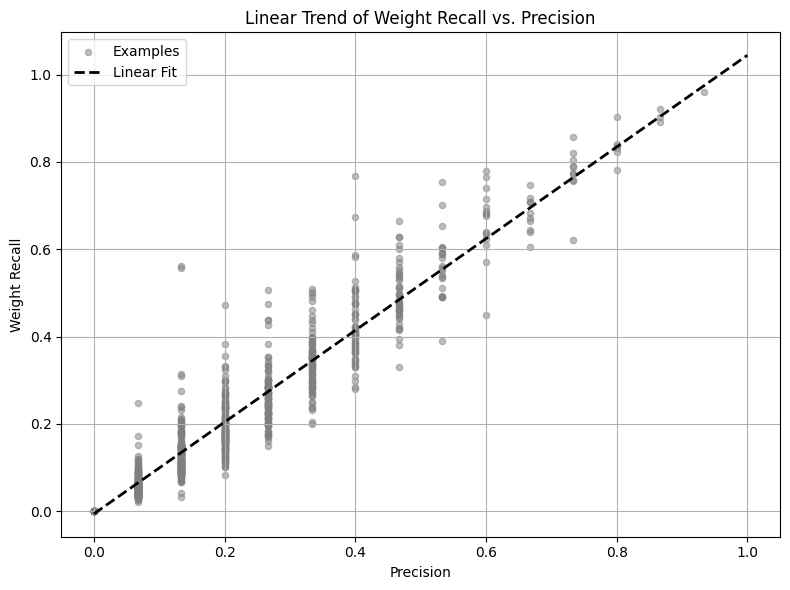

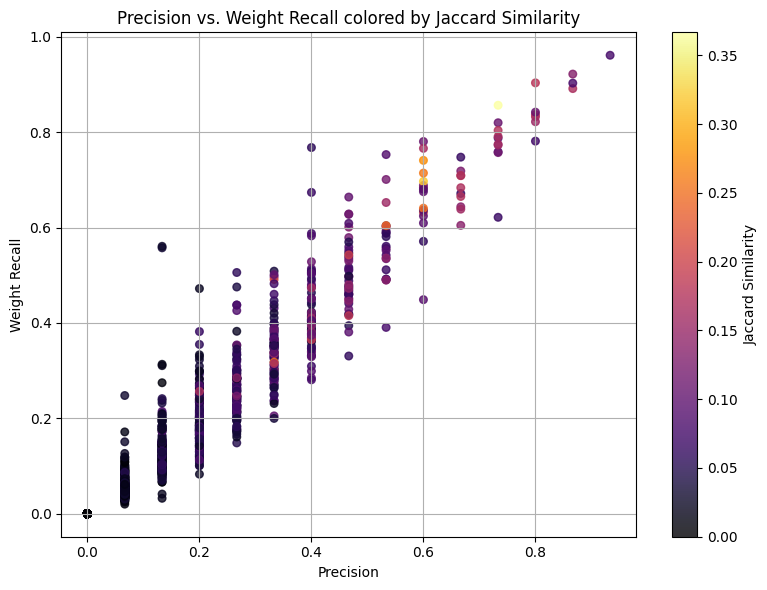

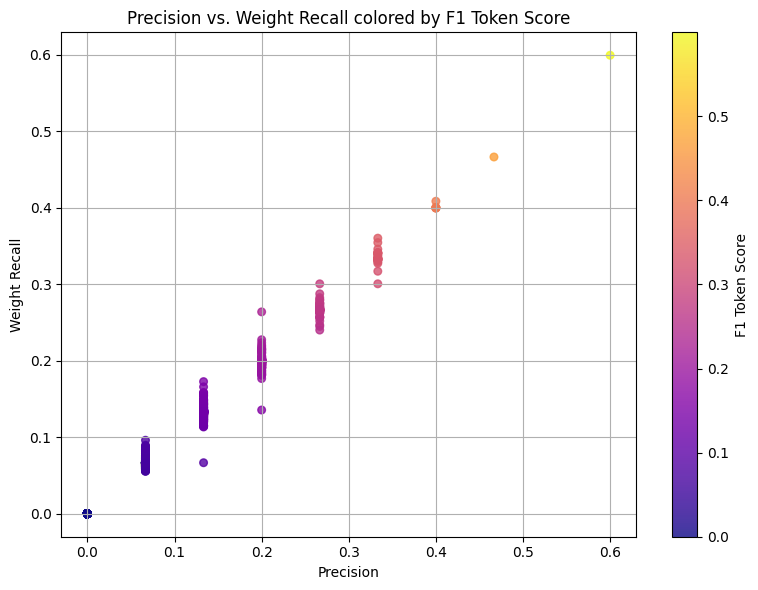

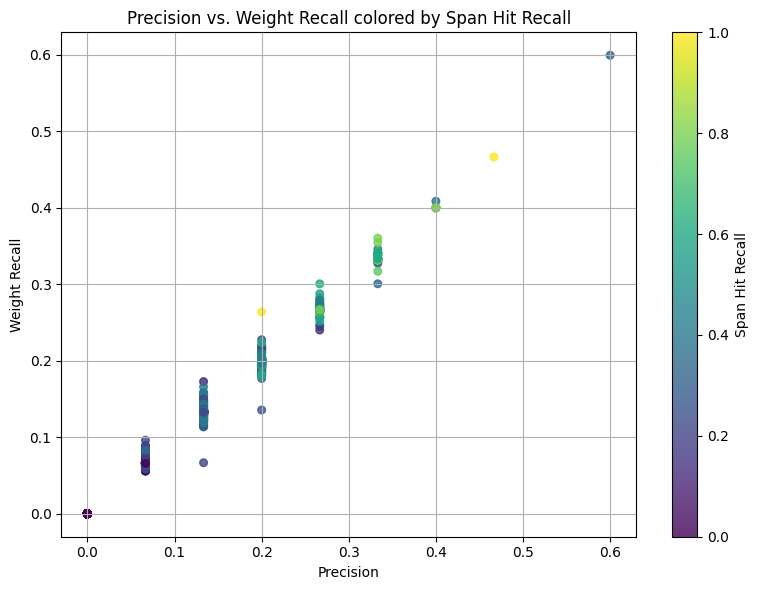

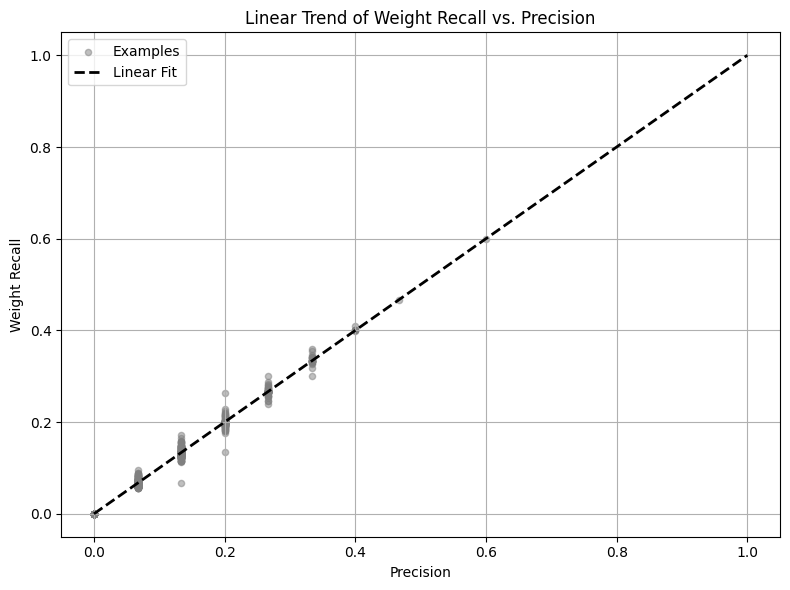

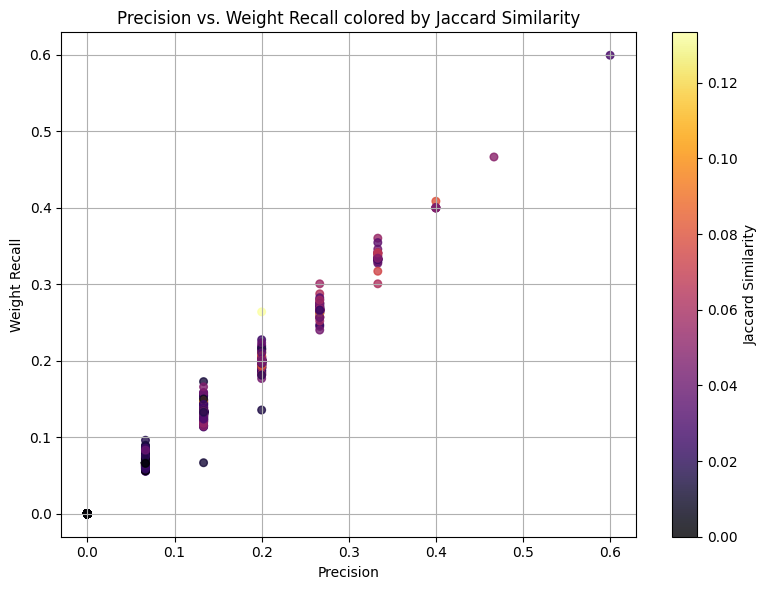

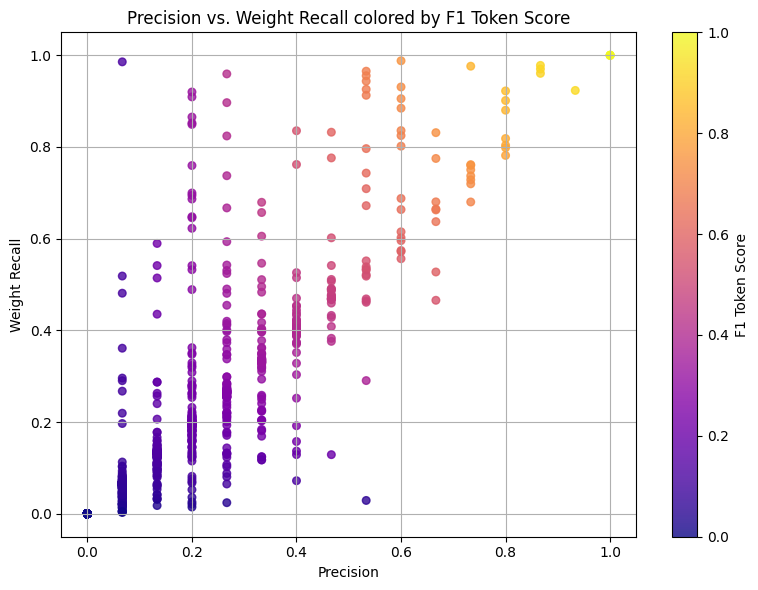

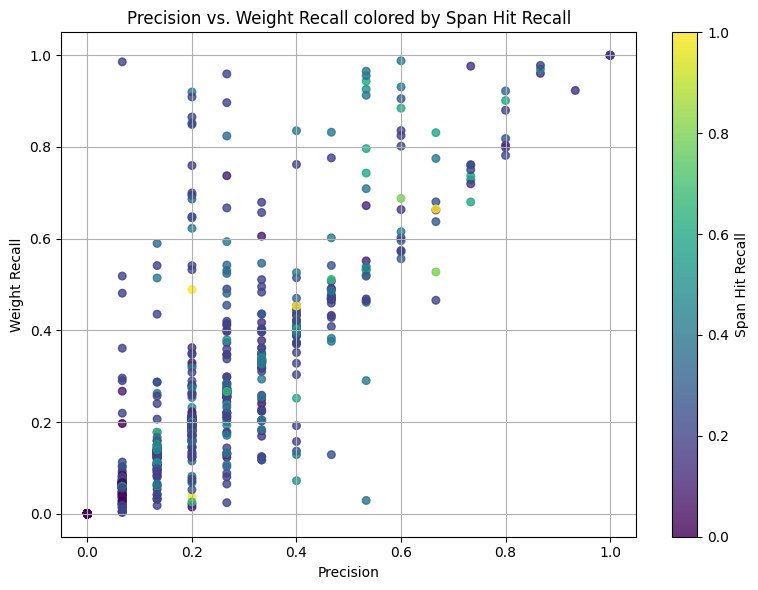

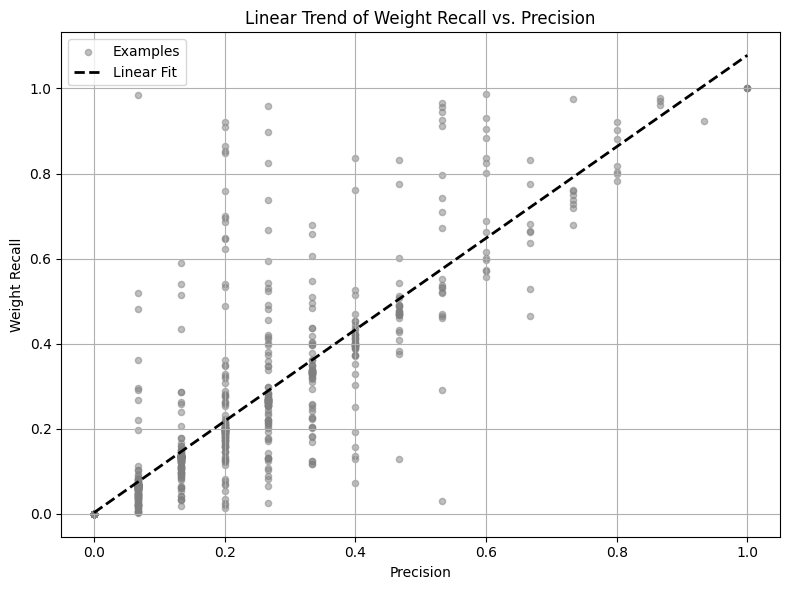

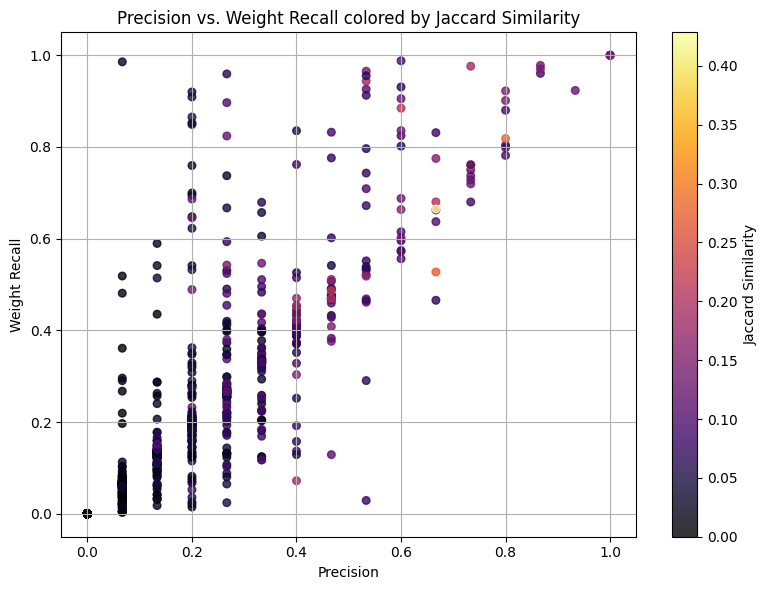

In [ ]:
for dir in eraser_dirs:
    df = merge_batches(dir)
    inspect_metric(df)

#### qualitative analysis

##### bert

In [ ]:
bert_grad_results_path = eraser_dir + bert_eraser_sub + '/gradient'
df_bert_grad_results = merge_batches_results(bert_grad_results_path)
df_bert_grad_results.head(15)

,id,text,label,tokens,weights,token_positions
global_id,,,,,,
0,0,"plot : two teen couples go to a church party ,...",Positive,"[harder, downs, problems, terribly, package, b...","[33.2167, 31.3888, 30.8914, 29.3167, 27.1414, ...","[98, 207, 179, 173, 88, 87, 205, 195, 154, 78,..."
1,1,the happy bastard 's quick movie review damn\n...,Positive,"[wasted, empty, substance, below, sunken, and,...","[32.4525, 18.9729, 16.0015, 15.9442, 14.9019, ...","[234, 100, 111, 204, 312, 235, 52, 233, 20, 23..."
2,2,it is movies like these that make a jaded movi...,Positive,"[predictable, like, these, slick, poorly, than...","[30.9096, 29.5232, 28.9923, 26.9215, 25.5367, ...","[435, 3, 4, 146, 427, 12, 157, 91, 8, 487, 486..."
3,3,""" quest for camelot "" is warner bros . '\nfirs...",Positive,"[able, missing, none, might, dead, pure, poorl...","[60.1905, 57.172, 47.2237, 40.394, 39.191, 35....","[322, 350, 452, 320, 123, 351, 407, 163, 321, ..."
4,4,synopsis : a mentally unstable man undergoing ...,Positive,"[brings, rejected, redundant, together, doomed...","[45.8237, 39.6077, 29.5824, 28.4522, 21.6591, ...","[417, 179, 210, 425, 212, 416, 419, 211, 166, ..."
5,5,capsule : in 2176 on the planet mars police ta...,Positive,"[surprising, cho, managed, ,, that, ##ck, but,...","[125.7019, 46.2463, 43.2988, 38.6183, 37.6817,...","[199, 173, 202, 198, 200, 174, 223, 197, 232, ..."
6,6,"so ask yourself what "" 8 mm "" ( "" eight millim...",Positive,"[neatly, ##some, whole, easy, certainly, drag,...","[62.3011, 38.9851, 37.3603, 36.9231, 35.9342, ...","[403, 25, 24, 428, 424, 311, 221, 29, 399, 226..."
7,7,that 's exactly how long the movie felt to me ...,Positive,"[none, funny, beside, mess, provides, annoying...","[12.2498, 10.8317, 9.4618, 9.3594, 9.1555, 8.7...","[465, 469, 349, 29, 454, 83, 505, 242, 471, 50..."
8,8,call it a road trip for the walking wounded .\...,Positive,"[accurate, reflection, restrain, adds, ever, f...","[280.6, 247.5558, 215.4588, 184.6348, 138.164,...","[116, 117, 355, 59, 54, 324, 56, 372, 52, 325,..."


In [ ]:
bert_grad_path = eraser_dir + bert_eraser_sub + '/gradient'
df_bert_grad = merge_batches(bert_grad_path)
df_bert_grad.head()

,precision,weight_recall,f1_token,jaccard_similarity,span_hit_recall
global_id,,,,,
0,0.600000,0.562107,0.580436,0.121622,0.454545
1,0.600000,0.668310,0.632315,0.296296,1.000000
2,0.266667,0.266405,0.266536,0.043478,0.272727
3,0.400000,0.335509,0.364927,0.139535,0.800000
4,0.200000,0.206485,0.203191,0.073171,0.250000


In [ ]:
bert_good_example = df_bert_grad[
    (df_bert_grad["f1_token"] > 0.7) & (df_bert_grad["span_hit_recall"] > 0.7)
].sort_values("f1_token", ascending=False).head(1)

bert_bad_example = df_bert_grad[
    (df_bert_grad["f1_token"] > 0) & (df_bert_grad["f1_token"] < 0.1) & (df_bert_grad["span_hit_recall"] < 0.2) & (df_bert_grad["span_hit_recall"] > 0)
].sort_values("f1_token", ascending=True).head(1)

bert_strange_example = df_bert_grad[
    (df_bert_grad["f1_token"] > 0.6) & (df_bert_grad["span_hit_recall"] < 0.2)
].sort_values("f1_token", ascending=False).head(1)

bert_good_example_results = df_bert_grad_results.loc[bert_good_example.index]
bert_bad_example_results = df_bert_grad_results.loc[bert_bad_example.index]
bert_strange_example_results = df_bert_grad_results.loc[bert_strange_example.index]

bert_good_example.to_csv('bert_good_metrics.csv')
bert_bad_example.to_csv('bert_bad_metrics.csv')
bert_strange_example.to_csv('bert_strange_metrics.csv')

bert_good_example_results.to_csv('bert_good_example_results.csv')
bert_bad_example_results.to_csv('bert_bad_example_results.csv')
bert_strange_example_results.to_csv('bert_strange_example_results.csv')

##### gpt

In [ ]:
gpt_grad_results_path = eraser_dir + gpt_eraser_sub + '/gradient'
df_gpt_grad_results = merge_batches_results(gpt_grad_results_path)
df_gpt_grad_results.head(15)

,id,text,label,tokens,weights,token_positions
global_id,,,,,,
0,0,"plot : two teen couples go to a church party ,...",Positive,"[Ġpassword, Ġenter, Ġworld, Ġyour, Ġfantasy, Ġ...","[31.2574, 22.993, 22.6409, 15.3227, 13.5219, 1...","[505, 507, 509, 508, 221, 504, 177, 285, 66, 5..."
1,1,the happy bastard 's quick movie review damn\n...,Positive,"[Ġ', Ġsunk, Ċ, Ġ,, Ġbastard, Ġsubstance, Ġ., Ġ...","[16.5224, 14.9768, 10.7509, 9.762, 9.3872, 8.5...","[333, 338, 328, 331, 1, 121, 327, 14, 330, 323..."
2,2,it is movies like these that make a jaded movi...,Positive,"[Ġ', Ġbas, Ġwhen, Ġquestionable, Ġespecially, ...","[19.009, 17.7596, 17.4984, 15.7826, 14.5642, 1...","[495, 488, 508, 504, 507, 489, 506, 505, 11, 5..."
3,3,""" quest for camelot "" is warner bros . '\nfirs...",Positive,"[Ġ', Ġend, Ġ,, Ġit, Ġbland, "", Ċ, Ġ., Ġfor, Ġr...","[52.9225, 30.8883, 24.0329, 23.2233, 22.9079, ...","[509, 506, 507, 508, 499, 361, 360, 502, 124, ..."
4,4,synopsis : a mentally unstable man undergoing ...,Positive,"[Ġ-, Ġ-, Ġpsycho, Ġdoomed, Ġvideo, Ġelaborate,...","[45.1679, 36.7924, 32.7586, 32.525, 31.4769, 2...","[508, 504, 507, 221, 107, 496, 494, 509, 106, ..."
5,5,capsule : in 2176 on the planet mars police ta...,Positive,"[prises, Ġalien, instead, Ġghosts, because, Ġm...","[20.3185, 19.6457, 11.8407, 11.3496, 11.0756, ...","[42, 508, 483, 498, 503, 124, 41, 505, 123, 21..."
6,6,"so ask yourself what "" 8 mm "" ( "" eight millim...",Positive,"[Ġflickering, Ġridiculous, asionally, Ċ, Ġobse...","[19.0143, 9.6716, 9.2842, 8.8206, 7.2291, 6.50...","[509, 320, 505, 501, 478, 502, 508, 498, 24, 3..."
7,7,that 's exactly how long the movie felt to me ...,Positive,"[umed, Ġar, Ġar, Ġ', Ġcost, n, s, Ċ, Ġ', rey, ...","[20.696, 18.5432, 16.1351, 14.7497, 14.1661, 1...","[508, 501, 475, 149, 507, 502, 150, 11, 455, 1..."
8,8,call it a road trip for the walking wounded .\...,Positive,"[Ġsimplistic, Ġdevices, Ġfabric, Ġthat, Ġloser...","[30.0461, 25.6251, 21.7296, 21.4704, 18.2177, ...","[507, 508, 436, 509, 28, 496, 22, 505, 498, 50..."


In [ ]:
gpt_grad_path = eraser_dir + gpt_eraser_sub + '/gradient'
df_gpt_grad = merge_batches(gpt_grad_path)
df_gpt_grad.head()

/content/drive/MyDrive/NLP_project/gpt_eraser/results/gradient


,precision,weight_recall,f1_token,jaccard_similarity,span_hit_recall
global_id,,,,,
0,0.200000,0.159701,0.177593,0.026316,0.125000
1,0.200000,0.282361,0.234149,0.088235,0.500000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.133333,0.084049,0.103104,0.030769,0.222222
4,0.066667,0.079307,0.072439,0.013699,0.125000


In [ ]:
gpt_good_example = df_gpt_grad[
    (df_gpt_grad["f1_token"] > 0.7) & (df_gpt_grad["span_hit_recall"] > 0.7)
].sort_values("f1_token", ascending=False).head(1)

gpt_bad_example = df_gpt_grad[
    (df_gpt_grad["f1_token"] > 0) & (df_gpt_grad["f1_token"] < 0.1) & (df_gpt_grad["span_hit_recall"] < 0.2) & (df_gpt_grad["span_hit_recall"] > 0)
].sort_values("f1_token", ascending=True).head(1)

gpt_strange_example = df_gpt_grad[
    (df_gpt_grad["f1_token"] > 0.6) & (df_gpt_grad["span_hit_recall"] < 0.2)
].sort_values("f1_token", ascending=False).head(1)


gpt_good_example_results = df_gpt_grad_results.loc[gpt_good_example.index]
gpt_bad_example_results = df_gpt_grad_results.loc[gpt_bad_example.index]
gpt_strange_example_results = df_gpt_grad_results.loc[gpt_strange_example.index]

gpt_good_example.to_csv('gpt_good_metrics.csv')
gpt_bad_example.to_csv('gpt_bad_metrics.csv')
gpt_strange_example.to_csv('gpt_strange_metrics.csv')

gpt_good_example_results.to_csv('gpt_good_example_results.csv')
gpt_bad_example_results.to_csv('gpt_bad_example_results.csv')
gpt_strange_example_results.to_csv('gpt_strange_example_results.csv')

#### comprehensiveness and sufficieny

In [ ]:
path = '/content/drive/MyDrive/NLP_project/gpt_eraser/results/'
comprehensiveness_15 = pd.read_parquet(path + 'comprehensiveness.parquet')
comprehensiveness_5 = pd.read_parquet(path + 'comprehensiveness_5.parquet')

In [ ]:
comp_15_pos = comprehensiveness_15[comprehensiveness_15['label'] == 'Positive']
comp_15_neg = comprehensiveness_15[~(comprehensiveness_15['label'] == 'Positive')]

comp_5_pos = comprehensiveness_5[comprehensiveness_5['label'] == 'Positive']
comp_5_neg = comprehensiveness_5[~(comprehensiveness_5['label'] == 'Positive')]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comprehensiveness_sufficiency(df):
    df['comprehensiveness'] = df['prob_full'] - df['prob_drop']
    df['sufficiency'] = df['prob_full'] - df['prob_tokens']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='method', y='comprehensiveness')
    plt.title('Comprehensiveness@15 by Method')
    plt.ylabel('Confidence Drop')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='method', y='sufficiency')
    plt.title('Sufficiency@15 by Method')
    plt.ylabel('Confidence Retention (Inverse)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

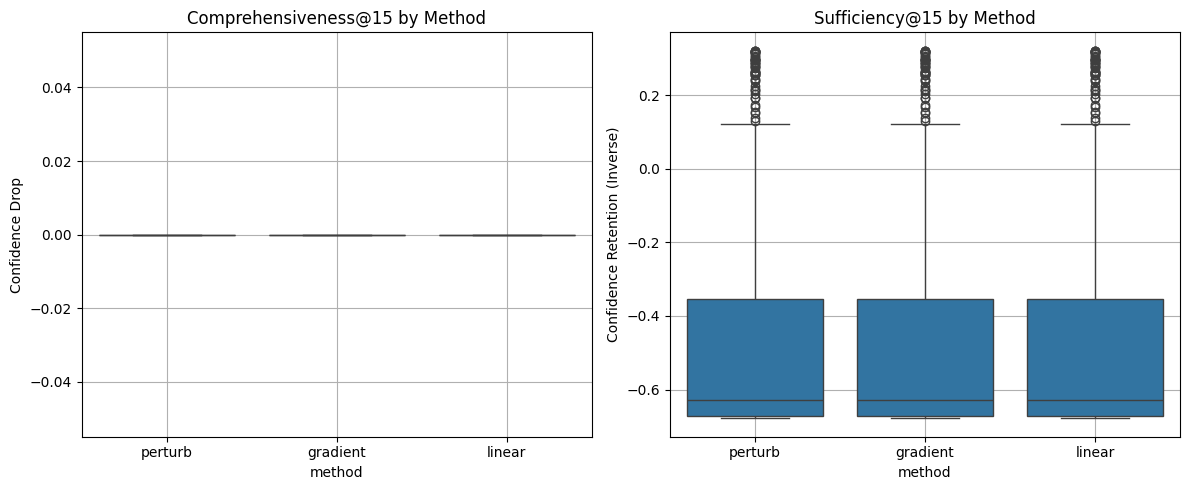

In [ ]:
plot_comprehensiveness_sufficiency(comp_5_pos)